In [2]:
from Environments.Simple_Env import SimpleMarket
import numpy as np
import matplotlib.pyplot as plt
import gym
import os
import gc
import pandas as pd

In [4]:
new_labels = pd.read_csv('Data/Label_based_RL/new_labels.csv')

In [6]:
coeffs = [0.25, 0.5, 1, 2]
for coeff in coeffs:
    new_labels = new_labels.pop('timestamps_{}'.format(coeff))

KeyError: 'timestamps_0.5'

In [2]:
env = SimpleMarket(env_config = {'action_mode': 1,
                               'last_states_num': None,
                               'version': 'long',
                               'curiosity_reward':0,}
                                , episode_length=10000,
                                  comission = 0.00)

Change Strategy to Sell After taking certain profit

In [3]:
%%time
state = env.reset()
assets = []
prices = []

for i in range(9999):
    if i % 1000 == 999:
        print(i)
        print("Asset_Gain {}".format(assets[-1] -assets[0]))

    if state[0] == 1:
        #print('buy')
        action = 3
    if state[0] == 0:
        #print('sell')
        action = 6
    state, reward, done, results = env.step(action)
    assets.append(env.last_assets)
    prices.append(env.current_price)
print("Asset_Gain {}".format(assets[-1] -assets[0]))

999
Asset_Gain 28.12357070923599
1999
Asset_Gain 69.26876354448086
2999
Asset_Gain 83.89210850018844
3999
Asset_Gain 102.10150362256854
4999
Asset_Gain 128.03476701150703
5999
Asset_Gain 150.9624656665162
6999
Asset_Gain 160.9266024396577
7999
Asset_Gain 190.75522151659266
8999
Asset_Gain 217.32632450898495
Asset_Gain 237.10701141689742
CPU times: user 2.17 s, sys: 105 ms, total: 2.28 s
Wall time: 2.11 s


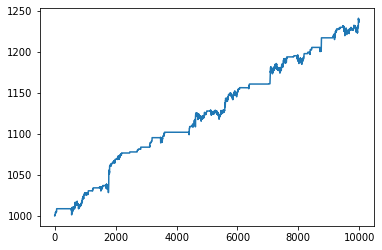

In [7]:
plt.plot(assets)

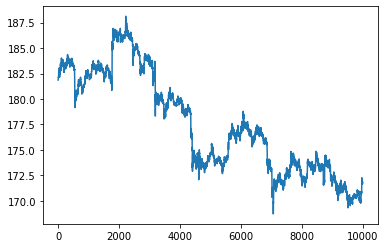

In [8]:
plt.plot(prices)

In [6]:
(assets[-1]/assets[0])/(prices[-1]/prices[0])

1.3100814132433296